<a href="https://colab.research.google.com/github/mauryask/Covid-19-Outbreak-Prediction/blob/master/covid_19_otbreak_pediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from fbprophet import Prophet

In [8]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'Country/Region':'Country'}, inplace=True)

## Descriptive Statistics

In [9]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,32356.000000,32356.000000,3.235600e+04,32356.000000,32356.000000,3.235600e+04
mean,21.436208,23.529106,5.509296e+03,365.825318,1706.502936,3.436968e+03
std,24.950218,70.449325,4.798578e+04,3316.563013,12014.942886,3.594818e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,-6.000000e+00
25%,7.873054,-15.310100,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.634500,21.745300,2.700000e+01,0.000000,1.000000,8.000000e+00
75%,41.204380,80.771797,5.132500e+02,7.000000,117.000000,2.170000e+02
max,71.706900,178.065000,1.651289e+06,98754.000000,366736.000000,1.190338e+06


In [10]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0.0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0.0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0.0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0.0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0.0,0.0,Africa


In [11]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
2,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
3,2020-01-22,Australia,Queensland,0.0,0.0,0.0
4,2020-01-22,Australia,South Australia,0.0,0.0,0.0


In [12]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
119,2020-05-20,112028.0,3434.0,45422.0
120,2020-05-21,118226.0,3584.0,48553.0
121,2020-05-22,124794.0,3726.0,51824.0
122,2020-05-23,131423.0,3868.0,54385.0


In [13]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,5594.20365,6140.869714,555.0,17.0,28.0,510.0
2020-01-23,5594.20365,6140.869714,654.0,18.0,30.0,606.0
2020-01-24,5594.20365,6140.869714,941.0,26.0,36.0,879.0
2020-01-25,5594.20365,6140.869714,1434.0,42.0,39.0,1353.0
2020-01-26,5594.20365,6140.869714,2118.0,56.0,52.0,2010.0


## Visualizing: Worldwide NCOVID-19 cases

In [14]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
active = df.groupby('Date').sum()['Active'].reset_index()

In [15]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=active['Date'], y=active['Active'], mode='lines+markers', name='Active', line=dict(color='Orange', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

## Visualizing Covid-19 cases in India

In [16]:
df_india =  df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered','Active']].sum().reset_index()
df_india.tail()

,Date,Confirmed,Deaths,Recovered,Active
119,2020-05-20,112028.0,3434.0,45422.0,63172.0
120,2020-05-21,118226.0,3584.0,48553.0,66089.0
121,2020-05-22,124794.0,3726.0,51824.0,69244.0
122,2020-05-23,131423.0,3868.0,54385.0,73170.0
123,2020-05-24,138536.0,4024.0,57692.0,76820.0


In [17]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=df_india['Date'], y=df_india['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_india['Date'], y=df_india['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=df_india['Date'], y=df_india['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=df_india['Date'], y=df_india['Active'], mode='lines+markers', name='Active', line=dict(color='Orange', width=2)))
fig.update_layout(title='India COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

##  Forecasting Total Number of Cases Worldwide

In [18]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [19]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [20]:
confirmed.tail()

,ds,y
119,2020-05-20,5003730.0
120,2020-05-21,5110064.0
121,2020-05-22,5216964.0
122,2020-05-23,5322253.0
123,2020-05-24,5413423.0


## Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet

In [21]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
126,2020-05-27
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31


In [22]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
126,2020-05-27,5.609645e+06,5.581845e+06,5.643320e+06
127,2020-05-28,5.701324e+06,5.667867e+06,5.736765e+06
128,2020-05-29,5.792811e+06,5.751296e+06,5.840133e+06
129,2020-05-30,5.881545e+06,5.831613e+06,5.940319e+06
130,2020-05-31,5.967033e+06,5.908608e+06,6.043619e+06


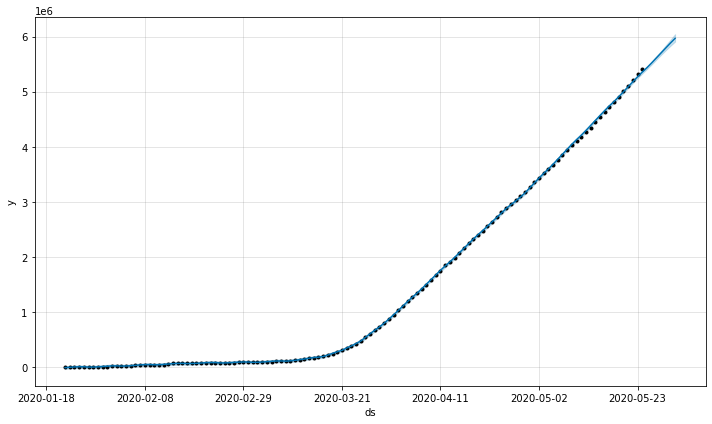

In [23]:
confirmed_forecast_plot = m.plot(forecast)

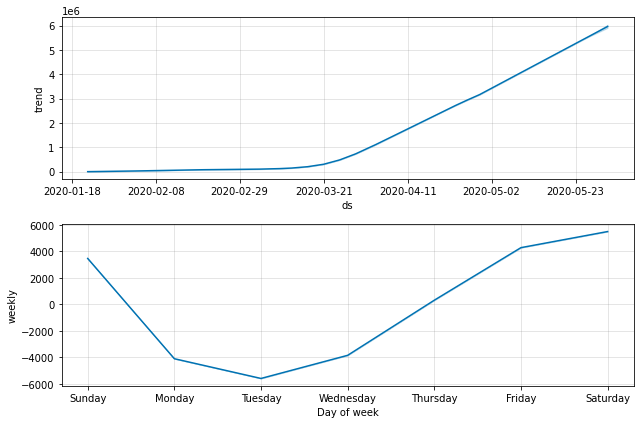

In [24]:
confirmed_forecast_plot =m.plot_components(forecast)

In [25]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [26]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
126,2020-05-27
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31


In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
126,2020-05-27,363548.583877,361606.187543,365648.476257
127,2020-05-28,368587.861945,366081.586869,371446.643105
128,2020-05-29,373648.835268,370288.302052,377345.257461
129,2020-05-30,378267.034329,374076.666951,383363.363489
130,2020-05-31,382318.596456,377025.458090,388691.706501


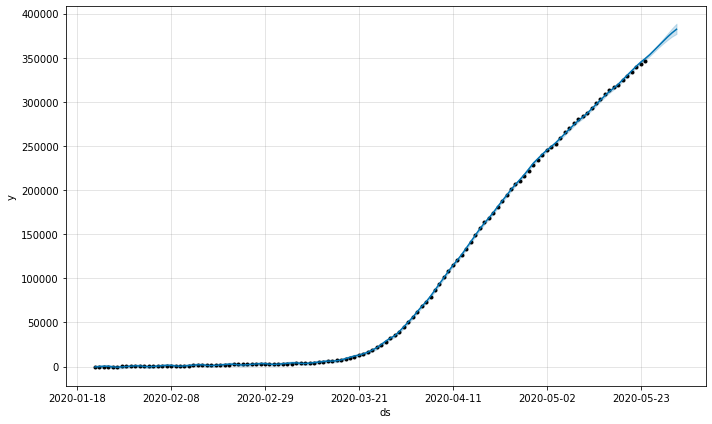

In [28]:
deaths_forecast_plot = m.plot(forecast)

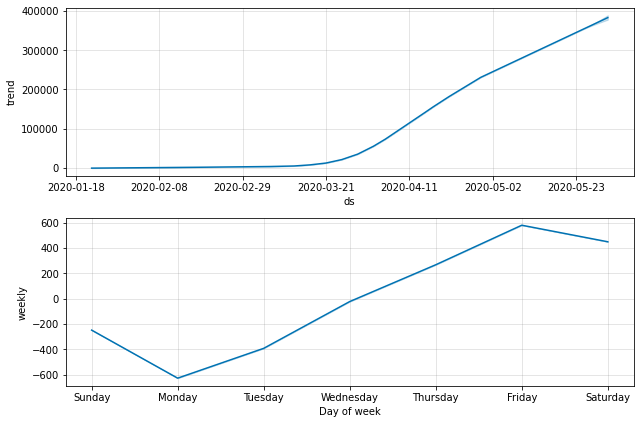

In [29]:
deaths_forecast_plot = m.plot_components(forecast)

In [30]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [31]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
126,2020-05-27
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
126,2020-05-27,2.167393e+06,2.137793e+06,2.200405e+06
127,2020-05-28,2.213333e+06,2.178723e+06,2.247020e+06
128,2020-05-29,2.261573e+06,2.227396e+06,2.294347e+06
129,2020-05-30,2.307793e+06,2.271947e+06,2.343452e+06
130,2020-05-31,2.350973e+06,2.312473e+06,2.394837e+06


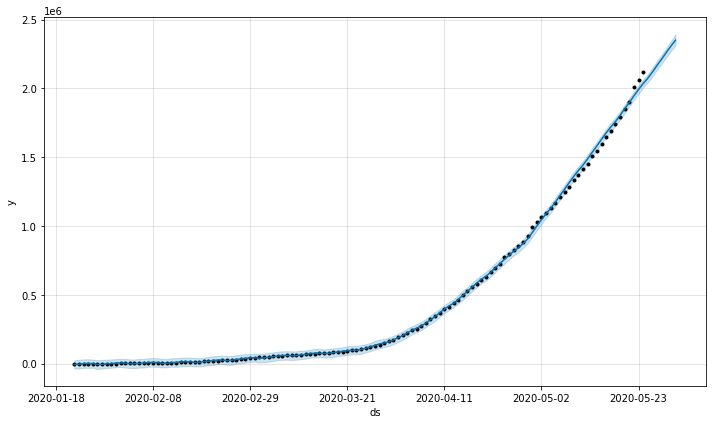

In [33]:
recovered_forecast_plot = m.plot(forecast)

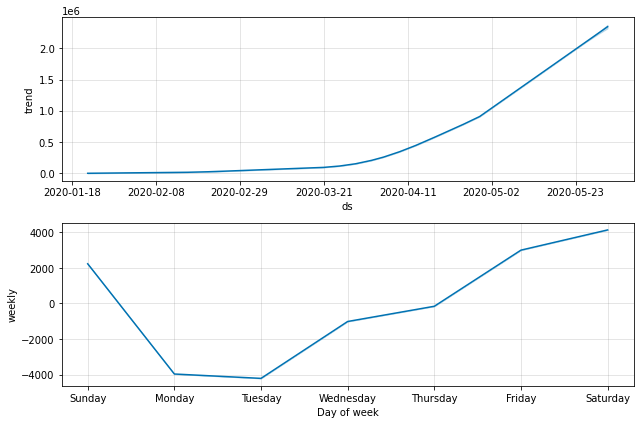

In [34]:
recovered_forecast_plot = m.plot_components(forecast)